## Problem Statement

Our customer, Don Francesco, manages a large jewelry store and seeks to use a comprehensive dataset he has gathered to automatically determine the prices for diamonds customers want to sell to him.

This dataset includes details on the characteristics and prices of diamonds, which closely reflect actual market values.

Our goal is to develop a model that can accurately predict the market price of a diamond based on its characteristics.

### Dataset
The dataset provides information on diamond prices and their attributes that impact their value, expressed in 2008 US Dollars.

Key attributes include the 4 Cs: `carat`, `cut`, `color`, and `clarity`. It also includes physical measurements such as `depth`, `table`, and dimensions (`x`, `y`, `z`).

Additional information is available in the dataset readme.

### Caution 💀💀💀
I'm confident that my analysis is accurate and the model is ready for deployment. However, I had to write the code quickly and some sections might not be up to standard. I apologize for this. Please ensure the codebase is thoroughly refined and optimized.

## Data Understanding

## Data Exploration & Preparation


### Importing data
We base all our analysis on a CSV export of Don Francesco's database. There may be other samples, but that's all we were able to get.

In [1]:
import pandas as pd

diamonds = pd.read_csv("https://raw.githubusercontent.com/xtreamsrl/xtream-ai-assignment-engineer/main/datasets/diamonds/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [2]:
diamonds.shape

(5000, 10)

First, let us check if there are really no missing data.

In [3]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Great! No missing data.

Let us check the summary of the dataset.

In [4]:
diamonds[['price']].describe()

,price
count,5000.00000
mean,3925.53940
std,3975.45212
min,-1.00000
25%,936.00000
50%,2392.50000
75%,5369.25000
max,18787.00000


There is something wrong. Negative prices and zero-dimensional stones are the result of mistakes.

In [5]:
diamonds[diamonds.x * diamonds.y * diamonds.z == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


In [6]:
diamonds[diamonds.price <= 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


That's not good. Let us remove those samples.

In [7]:
diamonds = diamonds[(diamonds.x * diamonds.y * diamonds.z != 0) & (diamonds.price > 0)]

Let us check again.

In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


Good, no more strange values. It looks like the distributions of the numerical variables are quite skewed: there are a few very big values and lots of smaller ones. Let us take a look to the charts.


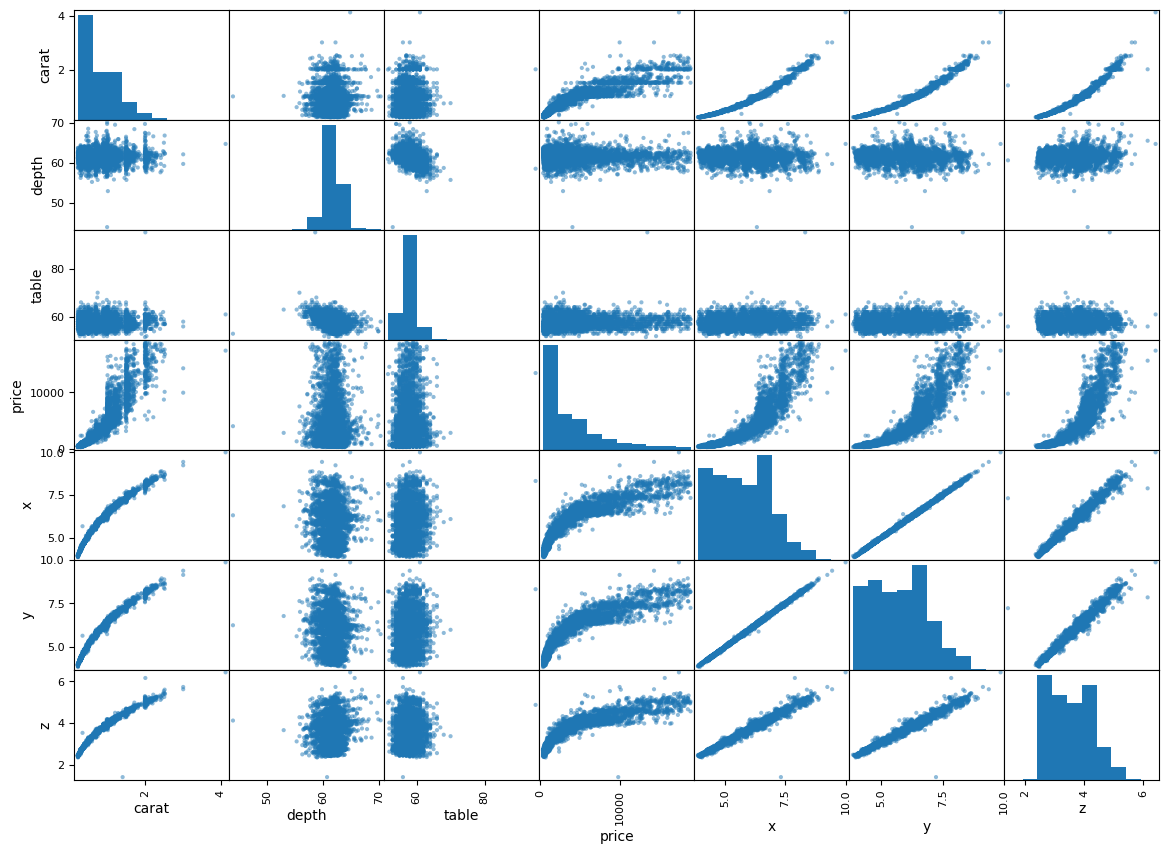

In [9]:
import numpy as np
from pandas.plotting import scatter_matrix

scatter_matrix(diamonds.select_dtypes(include=['number']), figsize=(14, 10));

We see several interesting things:
1. There are variables which does not look very correlated with the target (e.g table)
2. There are variables which look very correlated with the target, like carat, x, y and z, with non-linear patterns
3. There are variables which look correlated with each other (e.g. x, y and z)




Then, let us look into the distribution of single variables. We can use histograms.

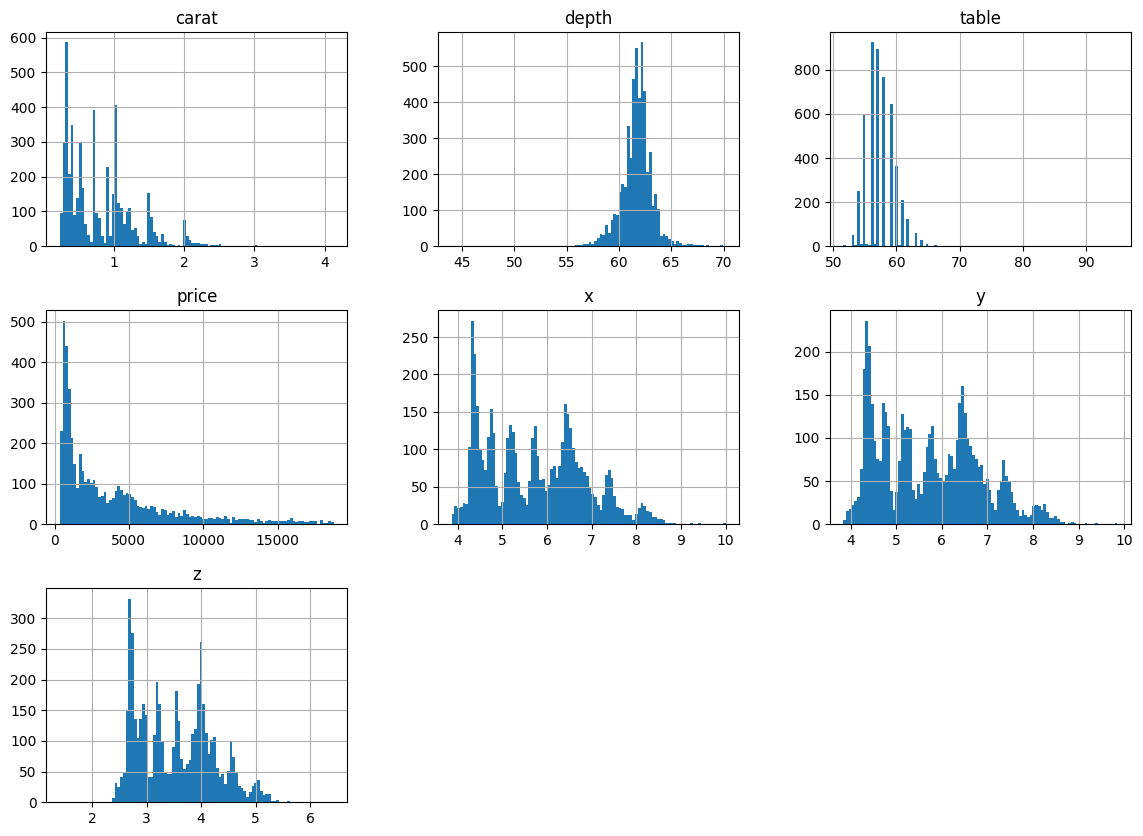

In [10]:
diamonds.hist(bins=100, figsize=(14, 10));

There are some outliers and it may be a good idea to remove them, but we will not do that at the moment.

Let us explore categorical variables: cut, color and clarity.

We can use box or violin charts.

In [11]:
import plotly.express as px

def plot_diamonds_price_by(diamonds_df, cut_column):
  return px.violin(diamonds_df, x=cut_column, y='price', color=cut_column, title=f'Price by {cut_column}')

In [12]:
plot_diamonds_price_by(diamonds, 'cut')

In [13]:
plot_diamonds_price_by(diamonds, 'color')

In [14]:
plot_diamonds_price_by(diamonds, 'clarity')

The distribution of the price differs with the values of each categorical variable. Therefore, it looks like all the variables may add relevant information.

To assess relationships between multiple variables, we need to map each one to a different graphical element, or aesthetic.

For instance, we can perform a scatter of price vs weight, with the categorical varaibles cut, color and clarity as color.

In [15]:
def scatter_diamods_by(diamonds_df, cut_column):
  return px.scatter(diamonds_df, x='carat', y='price', color=cut_column, title=f'Price vs carat with {cut_column}')

In [16]:
scatter_diamods_by(diamonds, 'cut')

In [17]:
scatter_diamods_by(diamonds, 'clarity')

In [18]:
scatter_diamods_by(diamonds, 'color')

The scatter plots confirm that all the categorical variables are relevant because, when we control for the weight of the stone, the categorical variables explain part of the remaining variance in the price.


## Linear Model

We'll begin with our preferred baseline: a straightforward, fully explainable linear model. However, we need to apply some transformations to the dataset before training the model.

### Data Preparation

First, we are going to drop all the irrelevant columns, namely depth and table.

Moreover, we also want to drop y and z, as they have high correlation with x.

In [19]:
diamonds_processed = diamonds.drop(columns=['depth', 'table', 'y', 'z'])
diamonds_processed.head()

,carat,cut,color,clarity,price,x
0,1.10,Ideal,H,SI2,4733,6.61
1,1.29,Ideal,H,SI1,6424,6.96
2,1.20,Premium,I,SI1,5510,6.88
3,1.50,Ideal,F,SI1,8770,7.43
4,0.90,Very Good,F,VS2,4493,6.17


Then, we are going to create dummy variables for cut, color and clarity.

Pandas has a very handy function for that.

In [20]:
diamonds_dummy = pd.get_dummies(diamonds_processed, columns=['cut', 'color', 'clarity'], drop_first=True)
diamonds_dummy.head()

,carat,price,x,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,4733,6.61,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
1,1.29,6424,6.96,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
2,1.20,5510,6.88,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,1.50,8770,7.43,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,0.90,4493,6.17,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False


Finally, we split X and Y, train and test.

We go for a random 80/20 split.

In [21]:
from sklearn.model_selection import train_test_split

x = diamonds_dummy.drop(columns='price')
y = diamonds_dummy.price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Modelling & evaluation

We will use a simple linear regression model.

We train the model and we evaluate its out-of-sample performances using r squared and Mean Absolute Error (MAE).

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error

print(f'R2 Score: {round(r2_score(y_test, pred), 4)}')
print(f'MAE: {round(mean_absolute_error(y_test, pred), 2)}$')

R2 Score: 0.9088
MAE: 760.69$


Let us visualize our results in a goodness of fit plot.

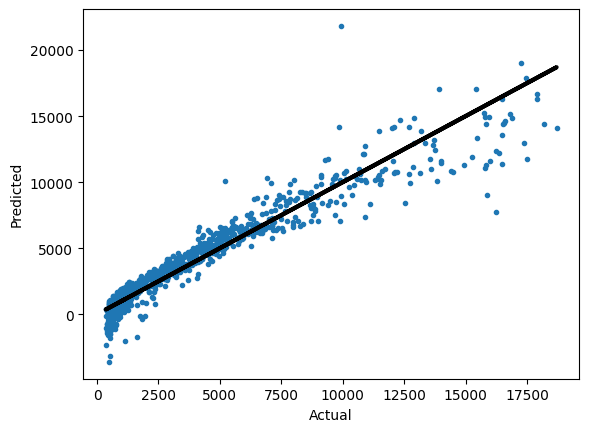

In [24]:
import matplotlib.pyplot as plt

def plot_gof(y_true: pd.Series, y_pred: pd.Series):
  plt.plot(y_true, y_pred, '.')
  plt.plot(y_true, y_true, linewidth=3, c='black')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

plot_gof(y_test, pred)

That's not good at all. We have some negative predicted prices.

To avoid this issue, we can perform a log transformation on the target variable.

In [25]:
y_train_log = np.log(y_train)

reg = LinearRegression()
reg.fit(x_train, y_train_log)
pred_log = reg.predict(x_test)
pred = np.exp(pred_log)

And we can check the same metrics as before.


In [26]:
print(f'R2 Score: {round(r2_score(y_test, pred), 4)}')
print(f'MAE: {round(mean_absolute_error(y_test, pred), 2)}$')

R2 Score: 0.9054
MAE: 561.54$


In [27]:
# Senza intercetta
print(f'R2 Score: {round(r2_score(y_test, pred), 4)}')
print(f'MAE: {round(mean_absolute_error(y_test, pred), 2)}$')

R2 Score: 0.9054
MAE: 561.54$


Much, much better. Again, we can visually assess the improvement.

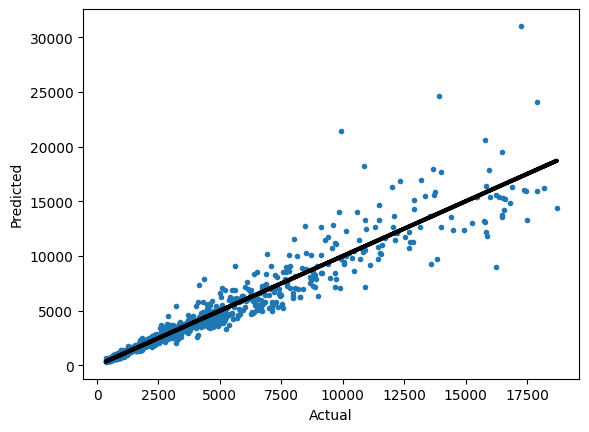

In [28]:
plot_gof(y_test, pred)

## extra analysis

In [29]:
coef_df = pd.DataFrame({'Colonna': x_train.columns, 'Coefficiente': reg.coef_})

In [30]:
coef_df

,Colonna,Coefficiente
0,carat,-0.803314
1,x,1.304823
2,cut_Good,-0.013388
3,cut_Ideal,0.011430
4,cut_Premium,-0.037741
5,cut_Very Good,0.008846
6,color_E,-0.072833
7,color_F,-0.108425
8,color_G,-0.170640
9,color_H,-0.270961


Having a negative coefficient for carat when predicting the price of a diamond suggests something might be wrong with the model or the data. This means that holding all else constant, an increase in carat would lead to a decrease in the predicted price of a diamond. This is counterintuitive.

Variables have already been eliminated, but the variable X should likely be removed as well because it is highly correlated with carat. Highly correlated variables generate multicollinearity.

Other aspects to consider are:

1. Variables may not be linearly related. Evaluate other relationships between variables.
2. Presence of outliers.
3. Standardization: Normally, this should be done first, but in this case, the scales of carat and X are not significantly different, so it may not have a substantial impact.


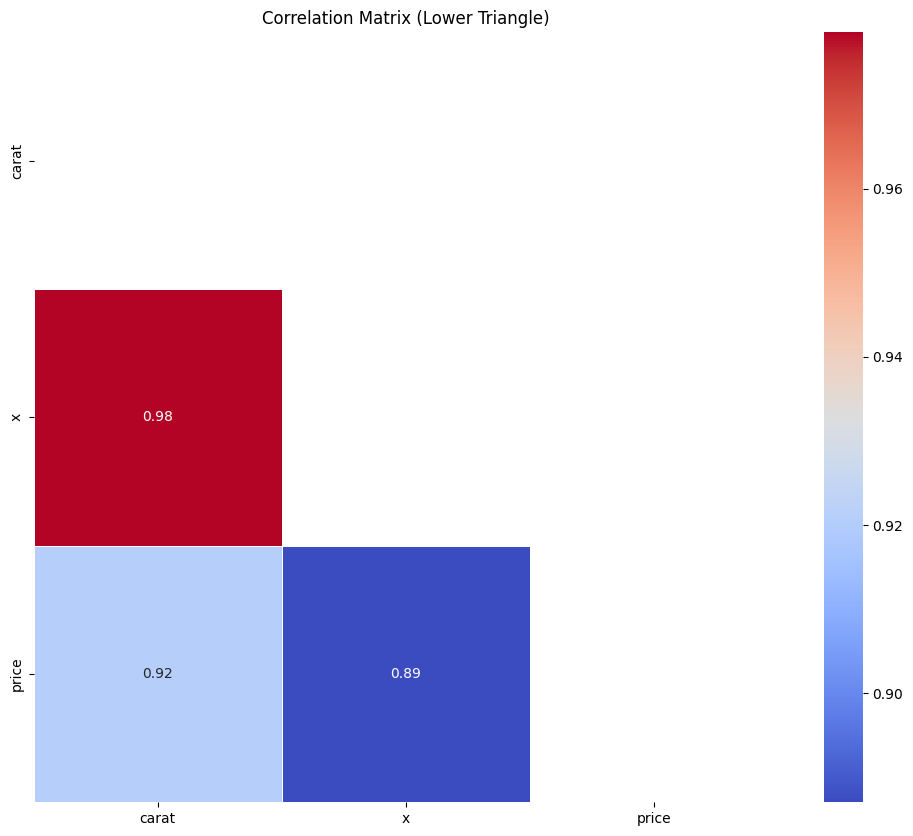

,carat,x,price
carat,1.000000,0.978600,0.920831
x,0.978600,1.000000,0.887051
price,0.920831,0.887051,1.000000


In [31]:
import seaborn as sns

correlation_matrix = diamonds_processed[['carat', 'x', 'price']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

correlation_matrix

Very high correlation between x and carat

In [32]:
def analisi_categorie(df, colonna):
    conteggio_categorie = df[colonna].value_counts()
    percentuali_categorie = (df[colonna].value_counts(normalize=True) * 100).round(2)
    risultato = pd.DataFrame({'Conteggio': conteggio_categorie, 'Percentuale': percentuali_categorie}).sort_values(by='Percentuale')

    return risultato

In [33]:
analisi_categorie(diamonds_processed, 'cut')

,Conteggio,Percentuale
cut,,
Fair,158,3.17
Good,456,9.14
Very Good,1097,21.99
Premium,1291,25.88
Ideal,1987,39.83


In [34]:
analisi_categorie(diamonds_processed, 'color')

,Conteggio,Percentuale
color,,
J,248,4.97
I,517,10.36
D,607,12.17
H,762,15.27
F,843,16.90
E,917,18.38
G,1095,21.95


In [35]:
analisi_categorie(diamonds_processed, 'clarity')

,Conteggio,Percentuale
clarity,,
I1,64,1.28
IF,150,3.01
VVS1,345,6.92
VVS2,464,9.30
VS1,801,16.06
SI2,843,16.90
VS2,1131,22.67
SI1,1191,23.87


## Gradient boosting
The linear regression is fun and simple, but more advanced models may be needed in order to achieve better performance. Let us try with xgboost.

### Data Preparation
We know that tree-based models do not suffer from collinear variables and prefer ordinal variables to categorical ones. Therefore, we need to change the preprocessing as well.

In [36]:
diamonds_processed_xgb = diamonds.copy()
diamonds_processed_xgb['cut'] = pd.Categorical(diamonds_processed_xgb['cut'], categories=['Fair', 'Good', 'Very Good', 'Ideal', 'Premium'], ordered=True)
diamonds_processed_xgb['color'] = pd.Categorical(diamonds_processed_xgb['color'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=True)
diamonds_processed_xgb['clarity'] = pd.Categorical(diamonds_processed_xgb['clarity'], categories=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], ordered=True)
diamonds_processed_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    4989 non-null   float64 
 1   cut      4989 non-null   category
 2   color    4989 non-null   category
 3   clarity  4989 non-null   category
 4   depth    4989 non-null   float64 
 5   table    4989 non-null   float64 
 6   price    4989 non-null   int64   
 7   x        4989 non-null   float64 
 8   y        4989 non-null   float64 
 9   z        4989 non-null   float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 327.3 KB


By using the same random seed, we ensure that the same samples end up in the test set, therefore the comparison between models is fair.

In [37]:
x_train_xbg, x_test_xbg, y_train_xbg, y_test_xbg = train_test_split(diamonds_processed_xgb.drop(columns='price'), diamonds_processed_xgb['price'], test_size=0.2, random_state=42)

### Modelling and Evaluation
As before, we train the model and we evaluate it with the same metrics.

In [38]:
import xgboost

xgb = xgboost.XGBRegressor(enable_categorical=True, random_state=42)
xgb.fit(x_train_xbg, y_train_xbg)
xgb_pred = xgb.predict(x_test_xbg)

In [39]:
print(f'R2 Score: {round(r2_score(y_test_xbg, xgb_pred), 4)}')
print(f'MAE: {round(mean_absolute_error(y_test_xbg, xgb_pred), 2)}$')

R2 Score: 0.9593
MAE: 354.95$


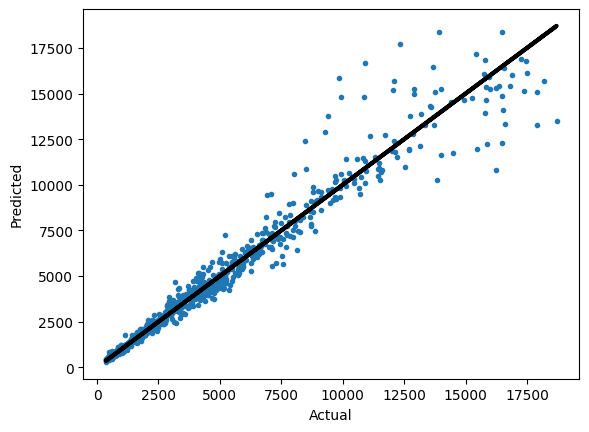

In [40]:
plot_gof(y_test_xbg, xgb_pred)

Much, much better. But we can do even better. Let's try and use optuna, a Bayesian hyperparameter tuning library.

In [41]:
!pip install --upgrade optuna

In [42]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def objective(trial: optuna.trial.Trial) -> float:
    # Define hyperparameters to tune
    param = {
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.7]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'random_state': 42,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'enable_categorical': True
    }

    # Split the training data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train_xbg, y_train_xbg, test_size=0.2, random_state=42)

    # Train the model
    model = xgboost.XGBRegressor(**param)
    model.fit(x_train, y_train)

    # Make predictions
    preds = model.predict(x_val)

    # Calculate MAE
    mae = mean_absolute_error(y_val, preds)

    return mae

study = optuna.create_study(direction='minimize', study_name='Diamonds XGBoost')
study.optimize(objective, n_trials=100)
print("Best hyperparameters: ", study.best_params)

[I 2024-06-18 13:40:41,538] A new study created in memory with name: Diamonds XGBoost
[I 2024-06-18 13:40:42,148] Trial 0 finished with value: 2866.5017074565862 and parameters: {'lambda': 0.00032463065674551795, 'alpha': 0.0028642380480097354, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 2.1769067837381492e-05, 'n_estimators': 357, 'max_depth': 6, 'min_child_weight': 8}. Best is trial 0 with value: 2866.5017074565862.
[I 2024-06-18 13:41:07,113] Trial 1 finished with value: 2882.7981494812852 and parameters: {'lambda': 0.1111436422196972, 'alpha': 0.007755075268662336, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 1.6946083151969845e-06, 'n_estimators': 834, 'max_depth': 9, 'min_child_weight': 3}. Best is trial 0 with value: 2866.5017074565862.
[I 2024-06-18 13:41:18,935] Trial 2 finished with value: 2884.3578609614556 and parameters: {'lambda': 4.079571070989829e-05, 'alpha': 1.2093875564374252e-06, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rat

Best hyperparameters:  {'lambda': 0.00012167515447376762, 'alpha': 0.4100489415903532, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.030592131661362564, 'n_estimators': 417, 'max_depth': 5, 'min_child_weight': 1}


Let's now re-train the model with the best set of hyperparameters.

In [43]:
xgb_opt = xgboost.XGBRegressor(**study.best_params, enable_categorical=True, random_state=42)
xgb_opt.fit(x_train_xbg, y_train_xbg)
xgb_opt_pred = xgb_opt.predict(x_test_xbg)

In [44]:
print(f'R2 Score: {round(r2_score(y_test_xbg, xgb_opt_pred), 4)}')
print(f'MAE: {round(mean_absolute_error(y_test_xbg, xgb_opt_pred), 2)}$')

R2 Score: 0.9677
MAE: 335.38$


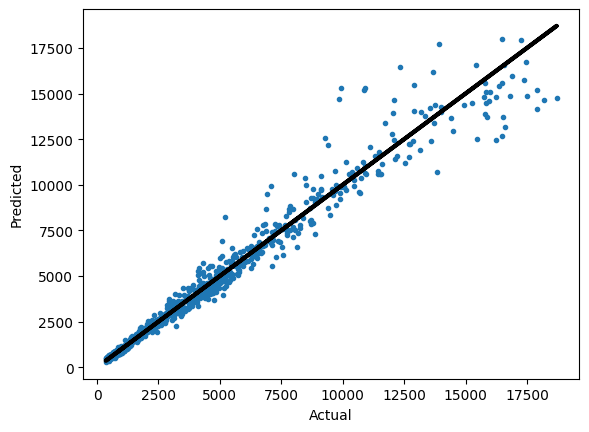

In [45]:
plot_gof(y_test_xbg, xgb_opt_pred)

A modest improvement. The model performs well, especially for smaller and less expensive gems. However, it shows larger errors with bigger stones, which warrants further investigation. For now, this is acceptable.

## Extra analysis

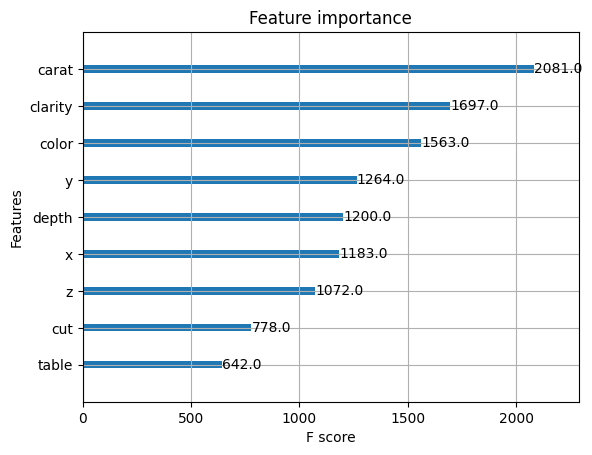

In [46]:
xgboost.plot_importance(xgb_opt, importance_type='weight')
plt.show()

In [47]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.1 MB/s eta 0:00:00


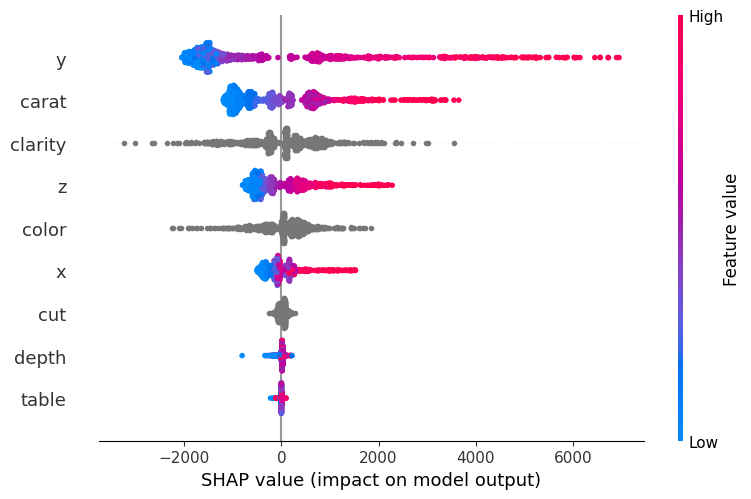

In [48]:
import shap
# SHAP values for detailed explanation
explainer = shap.TreeExplainer(xgb_opt)
shap_values = explainer.shap_values(x_test_xbg)

# Summary plot of SHAP values
shap.summary_plot(shap_values, x_test_xbg, feature_names=x_test_xbg.columns)

Carat shows a significant impact on the model. High values of carat increase the predicted value considerably. This is the expected behavior.

# Challenge 1

In [1]:
!pip install --upgrade optuna

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import datetime
import xgboost
import optuna
import pickle
import joblib
import shutil

#### preliminary_steps
Starting with the original df, I generate 6 smaller DataFrames, which will be treated as new input data.
These steps were done only to simulate the new data and prepare the environment, they should be done only once, before the first pipeline startup


In [36]:
def preliminary_steps():
  np.random.seed(42)
  diamonds = pd.read_csv("https://raw.githubusercontent.com/xtreamsrl/xtream-ai-assignment-engineer/main/datasets/diamonds/diamonds.csv")

  def split_dataframe(df, n):
      indices = np.array_split(df.index, n)
      return [df.iloc[idx] for idx in indices]

  dfs = split_dataframe(diamonds, 6)

  temp_dir = "/content/"
  for i, small_df in enumerate(dfs):
      file_path = os.path.join(temp_dir, f"diamonds_{20240611+i}.csv")
      small_df.to_csv(file_path, index=False)

  # Creazione file di log vuoto
  columns = ['TimeStamp', 'New Data', 'Model', 'R2 Score', 'MAE', 'Is Best']
  empty_df = pd.DataFrame(columns=columns)
  empty_df.to_csv('/content/log_file.csv', index=False)

  dir_models = '/content/models'
  if os.path.exists(dir_models):
      shutil.rmtree(dir_models)
  os.makedirs(dir_models)

  if os.path.exists('/content/merged_diamonds.csv'):
    os.remove('/content/merged_diamonds.csv')

#### load_new_data

To work in Colab, this function differs from what it would be if new data were received daily. In this case, the function reads the CSV files in ascending order and only checks if a file has already been read by referencing the log file.


In [6]:
def load_new_data(path):
  files = os.listdir(path)
  files.sort()
  files = [item for item in files if item.startswith("diamonds")]
  log = pd.read_csv(path + 'log_file.csv')

  for f in files:
    if f not in log['New Data'].values:
      return f, pd.read_csv(path + f)

  return 'No new data', pd.DataFrame()

#### general_preprocessing
Include in the function all pre-processing actions that should be applied to all data, regardless of the type of model used later. The initial data had no null values; however, the function considers the possibility of null values in future data. Currently, records with null values are handled by deletion, but other methods for handling missing values should be evaluated.

In [7]:
def general_preprocessing(data):
    data = data[(data.x * data.y * data.z != 0) & (data.price > 0)]
    data = data.dropna()
    return data

#### regression_preprocessing

Include in the function all the pre-processing steps necessary for performing the linear regression, as well as any additional steps specific to this particular model.

In [8]:
def regression_preprocessing(x):
    data_processed = x.drop(columns=['depth', 'table', 'y', 'z'])
    data_dummy = pd.get_dummies(data_processed, columns=['cut', 'color', 'clarity'], drop_first=True)
    return data_dummy

#### regression_train_model
The function includes all the necessary steps for training and testing the model. Unlike the original code, the intercept has been removed. Although this is not a common practice, in this specific case, I want the price of the diamond to be zero if all the explanatory variables are zero (as the diamond effectively does not exist).

In [9]:
def regression_model(x_train, x_test, y_train, y_test, main_directory, nomemodello, nomedati):
    y_train_log = np.log(y_train)
    reg = LinearRegression(fit_intercept=False) # tolta intercetta
    reg.fit(x_train, y_train_log)
    pred_log = reg.predict(x_test)
    pred = np.exp(pred_log)

    with open(f'{main_directory}models/{nomemodello}_{nomedati}.pkl', 'wb') as file:
      pickle.dump(reg, file)

    return reg, x_test, y_test, pred

#### evaluate_model


In [10]:
def evaluate_model(model_name,dataset_name, y_test, pred, data_directory):
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    new_log = {'TimeStamp': datetime.datetime.now(), 'New Data': dataset_name,
                'Model': model_name, 'R2 Score': round(r2, 4), 'MAE': round(mae, 2), 'Is Best': False}
    return new_log

There is limited value in selecting the best model in this initial task. More details about the assumptions made can be found at the end of the notebook

In [13]:
def select_best_model(data_directory, performances):

  new_log = pd.DataFrame(performances)
  new_log.loc[(new_log['R2 Score'] == new_log['R2 Score'].max()) & (new_log['MAE'] == new_log['MAE'].min()), 'Is Best'] = True

  log = pd.read_csv(data_directory + 'log_file.csv')
  pd.concat([log, new_log], ignore_index=True).to_csv(data_directory + 'log_file.csv', index=False)

  if new_log[new_log['Is Best']==True].shape[0]==1:
    return new_log.loc[new_log['Is Best']==True, 'Model']
  else:
    return 'Nessun modello selezionato, considerazioni necessarie'

#### pipeline challenge 1

Assumptions:
1. New data is uploaded to the same folder where the original data resides.
2. For the pipeline to work, the file name must be diamonds_ + upload date .csv. Assuming an automated pipeline, a trigger can be used to activate upon file upload. To prevent the trigger from activating unnecessarily, this naming constraint is used. If it is certain that only the data will ever be uploaded to the folder, this constraint can be removed.
3. When merging new data with existing data, it may happen that some new records are the same as others already within the original set.
This in itself is not problematic, think for example of the oversampling technique, which is often used in machine learning, however, it is good to be aware of the possible presence of duplicates, if not desired, add a .drop_duplicates() after the pd.concat; the dataset originally provided contained no duplicates.




In [14]:
def pipeline_c1(main_directory):
    if os.path.exists(main_directory+'merged_diamonds.csv'):
      merged_diamonds = pd.read_csv(main_directory+'merged_diamonds.csv')
    else:
      merged_diamonds=pd.DataFrame()

    name_data, new_data = load_new_data(main_directory)
    print(name_data)
    if name_data != 'No new data':
      merged_data = pd.concat([merged_diamonds, new_data]).reset_index(drop=True)
      merged_data.to_csv(main_directory + 'merged_diamonds.csv', index=False)

      preprocessed_data = general_preprocessing(merged_data)
      x = preprocessed_data.drop(columns='price')
      y = preprocessed_data.price

      # Linear Regression
      nome_mod_1 = 'Linear Regression'
      x_reg = regression_preprocessing(x)
      x_train_reg, x_test_reg, y_train, y_test = train_test_split(x_reg, y, test_size=0.2, random_state=42)
      model_reg, x_test_reg, y_test, pred_reg = regression_model(x_train_reg, x_test_reg, y_train, y_test,
                                                                 main_directory, nome_mod_1, name_data)
      performance_reg = evaluate_model(nome_mod_1, name_data, y_test, pred_reg, main_directory)

      best = select_best_model(main_directory, [performance_reg])

### Main

In [30]:
preliminary_steps()
for i in range(0,6):
  pipeline_c1('/content/')

diamonds_20240611.csv
diamonds_20240612.csv
diamonds_20240613.csv
diamonds_20240614.csv
diamonds_20240615.csv
diamonds_20240616.csv


# Challenge 2

In [31]:
def xg_preprocessing(x):
    x['cut'] = pd.Categorical(x['cut'], categories=['Fair', 'Good', 'Very Good', 'Ideal', 'Premium'], ordered=True)
    x['color'] = pd.Categorical(x['color'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=True)
    x['clarity'] = pd.Categorical(x['clarity'], categories=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], ordered=True)
    return x

In [32]:
def objective(trial: optuna.trial.Trial, x_train, y_train) -> float:
    # Define hyperparameters to tune
    param = {
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.7]),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'random_state': 42,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'enable_categorical': True
    }

    # Split the training data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Train the model
    model = xgboost.XGBRegressor(**param)
    model.fit(x_train, y_train)

    # Make predictions
    preds = model.predict(x_val)

    # Calculate MAE
    mae = mean_absolute_error(y_val, preds)

    return mae

In [33]:
def xg_model(x_train, x_test, y_train, y_test, main_directory, nomemodello, nomedati):
    study = optuna.create_study(direction='minimize', study_name='Diamonds XGBoost')
    study.optimize(lambda trial: objective(trial, x_train, y_train), n_trials=100)

    xgb_opt = xgboost.XGBRegressor(**study.best_params, enable_categorical=True, random_state=42)
    xgb_opt.fit(x_train, y_train)
    xgb_opt_pred = xgb_opt.predict(x_test)

    with open(f'{main_directory}models/{nomemodello}_{nomedati}.pkl', 'wb') as file:
      pickle.dump(xgb_opt, file)

    return xgb_opt, x_test, y_test, xgb_opt_pred

Currently, the best model is identified as the one with both the highest R2 and the lowest MAE. In the present case, this condition always occurs. However, there might be situations where this condition is not met. In such cases, it is necessary to decide which of the two metrics to prioritize.


### Pipeline challenge 2

In [34]:
def pipeline_c2(main_directory):
    if os.path.exists(main_directory+'merged_diamonds.csv'):
      merged_diamonds = pd.read_csv(main_directory+'merged_diamonds.csv')
    else:
      merged_diamonds=pd.DataFrame()

    name_data, new_data = load_new_data(main_directory)
    print(name_data)
    if name_data != 'No new data':
      merged_data = pd.concat([merged_diamonds, new_data]).drop_duplicates().reset_index(drop=True)
      merged_data.to_csv(main_directory + 'merged_diamonds.csv', index=False)

      preprocessed_data = general_preprocessing(merged_data)
      x = preprocessed_data.drop(columns='price')
      y = preprocessed_data.price

      # Linear Regression
      nome_mod_1 = 'Linear Regression'
      x_reg = regression_preprocessing(x)
      x_train_reg, x_test_reg, y_train, y_test = train_test_split(x_reg, y, test_size=0.2, random_state=42)
      model_reg, x_test_reg, y_test, pred_reg = regression_model(x_train_reg, x_test_reg, y_train, y_test,
                                                                 main_directory, nome_mod_1, name_data)
      performance_reg = evaluate_model(nome_mod_1, name_data, y_test, pred_reg, main_directory)

      # XGBoost
      nome_mod_2 = 'XGBoost'
      x_xg = xg_preprocessing(x)
      x_train_xg, x_test_xg, y_train, y_test = train_test_split(x_xg, y, test_size=0.2, random_state=42)
      model_xg, x_test_xg, y_test, pred_xg = xg_model(x_train_xg, x_test_xg, y_train, y_test,
                                                      main_directory, nome_mod_2, name_data)
      performance_xg = evaluate_model(nome_mod_2, name_data, y_test, pred_xg, main_directory)

      # Aggiungere qui qualsiasi altro modello si desideri
      # preprocessing specifico
      # train test split
      # modello
      # performance

      # best model
      best = select_best_model(main_directory, [performance_reg, performance_xg])

This for loop simulates the data passing and reception process.
It would be more efficient to use a trigger-based system to start the pipeline.

### Main

In [ ]:
preliminary_steps()
for i in range(0,6):
  pipeline_c2('/content/')

# Result and comment

In [37]:
log = pd.read_csv('/content/log_file.csv')

Final Considerations:

The best model for each dataset is recorded in the log file. Note that the "New Data" column specifies which data were added to the merged_diamonds file, representing the newly added data.

For each dataset, the best model is identified using the same training and testing data. Comparing the performance of two models using different test datasets would be technically unfair, as the best performance could result from the randomness of the test data extraction.

It's important to mention that no cross-validation techniques were used to enhance the reliability of the metrics, especially for the linear model. This means that the reported performance metrics may not fully reflect the model's generalizability.


Given the original request to build a pipeline that adjusts models, new data must be considered. Using a single test set to compare models may not be optimal because the original data's characteristics may change after multiple data additions. For example, diamonds with clarity I1 are only 1.28% of the dataset. After adding more data, this class might become even more underrepresented in the test set.

Training and test data should have similar characteristics. If new data matches the original data, using a single test set could work. Otherwise, the training and test sets need to be updated to reflect the new data accurately.

The results presented so far illustrate the scenario where the train and test sets need updating. However, if you are confident that adding new data maintains the original dataset's characteristics, you can extract a test set and compare models trained on different amounts of data based on their performance on this common test set.

Using the information contained in New Data (data name) and Model (model name) you can easily retrieve the model you want to use. The model name is in fact modelname_dataname

In [ ]:
log

,TimeStamp,New Data,Model,R2 Score,MAE,Is Best
0,2024-06-17 20:35:03.038841,diamonds_20240611.csv,Linear Regression,0.9002,676.17,False
1,2024-06-17 20:35:44.383377,diamonds_20240611.csv,XGBoost,0.9065,608.90,True
2,2024-06-17 20:35:44.438833,diamonds_20240612.csv,Linear Regression,0.8634,542.44,False
3,2024-06-17 20:36:44.395519,diamonds_20240612.csv,XGBoost,0.9595,338.69,True
4,2024-06-17 20:36:44.458559,diamonds_20240613.csv,Linear Regression,0.8962,571.74,False
5,2024-06-17 20:37:50.491353,diamonds_20240613.csv,XGBoost,0.9623,348.96,True
6,2024-06-17 20:37:50.557136,diamonds_20240614.csv,Linear Regression,0.9180,521.87,False
7,2024-06-17 20:39:04.012693,diamonds_20240614.csv,XGBoost,0.9697,323.81,True
8,2024-06-17 20:39:04.084704,diamonds_20240615.csv,Linear Regression,0.9024,537.50,False
9,2024-06-17 20:40:30.178375,diamonds_20240615.csv,XGBoost,0.9707,318.66,True
